<a href="https://colab.research.google.com/github/anirudh9784/Chemical-Compound-prediction/blob/master/Chemical_dataset_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving musk_csv.csv to musk_csv.csv


{'musk_csv.csv': b'ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class\r\n1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,-44,98,-33,-314,-282,-335,-144,-13

In [0]:
import numpy as np
import pandas as pd

In [0]:
from fastai import *
from fastai.tabular import *
from fastai.vision import *

In [0]:
df=pd.read_csv("musk_csv.csv")
from sklearn.utils import shuffle
df = shuffle(df)

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [0]:
dep_var='class'
cat_names=[ 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46','f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77','f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150','f151', 'f152','f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166']

In [0]:
predd=test[['class']]

In [0]:
path='content/'
valid_idx = range(len(train)-1000, len(train))

In [0]:
train=train.drop(columns="molecule_name")
train=train.drop(columns="ID")
train=train.drop(columns="conformation_name")
test=test.drop(columns="molecule_name")
test=test.drop(columns="ID")
test=test.drop(columns="conformation_name")
test=test.drop(columns='class')

In [0]:
procs = [FillMissing, Categorify, Normalize]
data = TabularDataBunch.from_df(path, train, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)

In [0]:
learn = tabular_learner(data, layers=[200,100],  metrics=accuracy)
learn.fit_one_cycle(10,1E-03)

In [0]:
learn.validate()

[0.19327745, tensor(0.9570)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.45E-05
Min loss divided by 10: 3.31E-07


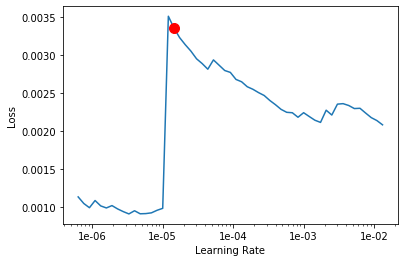

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

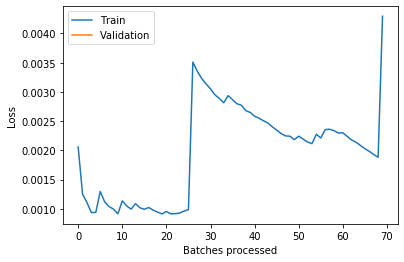

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.show_results()

In [0]:
predd,y, loss = learn.get_preds(with_loss=True)
acc = accuracy(predd, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.9570000171661377 %.


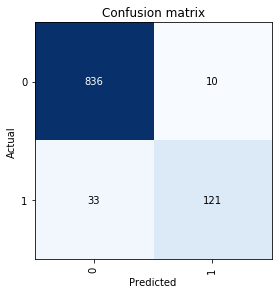

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix')

In [0]:
from sklearn.metrics import roc_curve, auc
probs = np.exp(predd[:,1])
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.976240367197814
